In [1]:
# Created by Dr. Sangamesh Deepak R to teach Robotics online during covid 19 outbreak

import sympy as sy
import numpy as np
sy.init_printing()

In [2]:
# Link parameters
a1 = 1
a2 = 0
a3 = sy.sqrt(2)

alpha1 = 0
alpha2 = sy.pi/4
alpha3 = 0


In [3]:
# Joint parameters

theta1 = sy.Symbol(r'\theta_1')
theta2 = sy.Symbol(r'\theta_2')
theta3 = sy.Symbol(r'\theta_3')
theta4 = sy.Symbol(r'\theta_4')

d1 = 0
d2 = 0
d3 = sy.sqrt(2)
d4 = 0


In [4]:
# transformation from of i' frame with respect to i frame

def link_transform(a_i, alpha_i):
    Link_T = sy.Matrix([[1, 0, 0, a_i], [0, sy.cos(alpha_i), -sy.sin(alpha_i), 0], [0, sy.sin(alpha_i), sy.cos(alpha_i), 0], \
                   [0,0,0,1] ])
    return Link_T

In [5]:
# transformation of i frame with respect to (i-1)' frame'
def joint_transform(d_i, theta_i):
    Joint_T = sy.Matrix([[sy.cos(theta_i),  -sy.sin(theta_i), 0, 0], 
                        [sy.sin(theta_i),  sy.cos(theta_i), 0, 0], 
                        [0, 0, 1, d_i],
                        [0,0,0,1] ])
    return Joint_T


In [6]:
# Computation of transformation matricies of different link frames with respect to the ground frame
T_0 = sy.Identity(4)
T_0_1 = joint_transform(d1, theta1)


T_1_2 = sy.trigsimp( link_transform(a1, alpha1)*joint_transform(d2, theta2) )
T_0_2 = sy.trigsimp( T_0_1* T_1_2); 

T_2_3 = sy.trigsimp(link_transform(a2, alpha2)*joint_transform(d3, theta3) )
T_0_3 = sy.trigsimp( T_0_2* T_2_3); 

T_3_4 = sy.trigsimp(link_transform(a3, alpha3)*joint_transform(d4, theta4) )
T_0_4 = sy.trigsimp( T_0_3* T_3_4); 


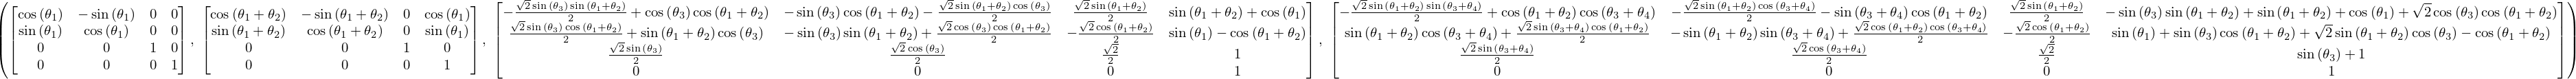

In [7]:
T_0_1, T_0_2, T_0_3, T_0_4 # Transformation matricies of first, second, third and fourth bodies

In [8]:
T_0_4[2,3]   # (3,4)th element of trnasformation matrix for 4 frame

In [9]:
# Extraction of Rotation matrices
R_0_1= T_0_1[0:3,0:3]
R_1_2= T_1_2[0:3,0:3]
R_2_3= T_2_3[0:3,0:3]
R_3_4= T_3_4[0:3,0:3]

r_0_1=T_0_1[0:3,3]
r_1_2=T_1_2[0:3,3]
r_2_3=T_2_3[0:3,3]
r_3_4=T_3_4[0:3,3]


In [10]:
 def cross_product(a,b):
        c=sy.Matrix([
            [a[1,0]*b[2,0]-a[2,0]*b[1,0]],
            [a[2,0]*b[0,0]-a[0,0]*b[2,0]],
            [a[0,0]*b[1,0]-a[1,0]*b[0,0]]
            ])
        return c

In [11]:
m=sy.Matrix([[0],[0],[1]])
n=sy.Matrix([[1],[0],[0]])
p = cross_product(m,n)
p

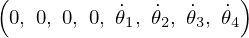

In [12]:
d_d1=0
d_d2=0
d_d3=0
d_d4=0
 
d_theta1 = sy.Symbol(r'\dot{\theta}_1')
d_theta2 = sy.Symbol(r'\dot{\theta}_2')
d_theta3 = sy.Symbol(r'\dot{\theta}_3')
d_theta4 = sy.Symbol(r'\dot{\theta}_4')

d_d1, d_d2, d_d3, d_d4, d_theta1, d_theta2, d_theta3, d_theta4 

In [13]:
omega_0_0 = sy.Matrix([[0],[0],[0]])   
v_0_0 = sy.Matrix([[0],[0],[0]])   


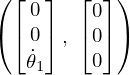

In [14]:
omega_1_1= R_0_1.T*(omega_0_0)+sy.Matrix([[0],[0],[d_theta1] ])

v_1_1 = R_0_1.T*(v_0_0 + cross_product(omega_0_0,r_0_1))+sy.Matrix([[0],[0],[d_d1] ])

omega_1_1, v_1_1

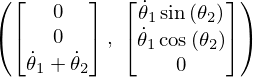

In [15]:
omega_2_2= R_1_2.T*(omega_1_1)+sy.Matrix([[0],[0],[d_theta2] ])

v_2_2 = R_1_2.T*(v_1_1 + cross_product(omega_1_1,r_1_2))+sy.Matrix([[0],[0],[d_d2] ])

omega_2_2, v_2_2

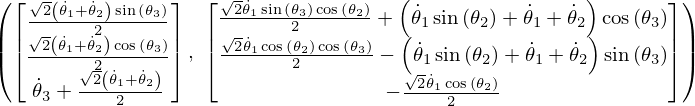

In [16]:
omega_3_3= R_2_3.T*(omega_2_2)+sy.Matrix([[0],[0],[d_theta3] ])

v_3_3 = R_2_3.T*(v_2_2 + cross_product(omega_2_2,r_2_3))+sy.Matrix([[0],[0],[d_d3] ])

omega_3_3, v_3_3

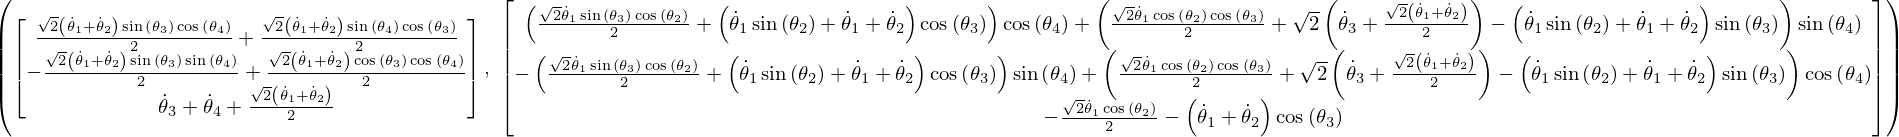

In [17]:
omega_4_4= R_3_4.T*(omega_3_3)+sy.Matrix([[0],[0],[d_theta4] ])

v_4_4 = R_3_4.T*(v_3_3 + cross_product(omega_3_3,r_3_4))+sy.Matrix([[0],[0],[d_d4] ])

omega_4_4, v_4_4

In [18]:
R_0_4= T_0_4[0:3,0:3]
#v_0_4=sy.trigsimp(R_0_4*v_4_4)   

In [19]:
r_0_4=T_0_4[0:3,3]


In [20]:
diff_v_4_4=R_0_4.T*sy.trigsimp(
sy.diff(r_0_4, theta1)*d_theta1+
sy.diff(r_0_4, theta2)*d_theta2+
sy.diff(r_0_4, theta3)*d_theta3 +
sy.diff(r_0_4, theta4)*d_theta4
    )


In [21]:
sy.trigsimp(v_4_4-diff_v_4_4)   

## Verification of ${}^{4}\omega_4$

## ${}^{4}\omega_4$ is equal to vector for of the skew symmetric matrix  $\left({}^{0}\boldsymbol{R}_4\right)^{T} {{}^{0}\boldsymbol{\dot{R}}_4} $

In [22]:
diff_R_4_4=R_0_4.T*sy.trigsimp(
sy.diff(R_0_4, theta1)*d_theta1+
sy.diff(R_0_4, theta2)*d_theta2+
sy.diff(R_0_4, theta3)*d_theta3 +
sy.diff(R_0_4, theta4)*d_theta4
    )

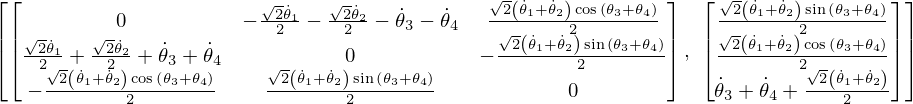

In [23]:
[sy.trigsimp(diff_R_4_4), sy.trigsimp(omega_4_4)]

In [24]:
def skew_vector(M):
    v = sy.Matrix([[M[2,1]], [M[0,2]], [M[1,0]]])
    return v

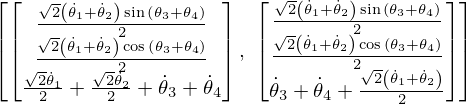

In [25]:
[sy.trigsimp(skew_vector(diff_R_4_4)), sy.trigsimp(omega_4_4)]

## ${}^{4}\omega_4$ is verified above

# Assignment 2 solution completed. We now focus on Assignment 4 solution

## The workspace boundaries of the robot can be split into parts shown in the figure:

<img  style="transform: rotate(0deg)" src='worspace_boundaries.jpg' width="100%"  />


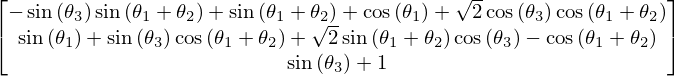

In [26]:
r_0_4

## Lower surface condition is the condition for extremum which you may recall from calculus

## $\dfrac{\partial {}^{0}\boldsymbol{r}_{4,z}}{\partial \theta_3} = 0$

## Note that ${}^{0}\boldsymbol{r}_{4,z}$ depends only on $\theta_3$. Partial derivatives with respect tot $\theta_1$, $\theta_2$ would not yield useful conditions

In [27]:
WS_z = r_0_4[2]

In [28]:
sy.diff(WS_z, theta3)

## $\cos \theta_3 = 0$ implies that $\theta_3 = \frac{\pi}{2} \pm N \pi$, $N \in Integers$

## Since we are looking for minimum value, we choose the following as our condition for the lower surface:

# Condition 1:

## $\theta_3 = -\frac{\pi}{2} \pm 2 N \pi$, $N \in Integers$

## Let us write the extremum condition for Inner and outer surfaces

## $\dfrac{\partial \left( {}^{0}\boldsymbol{r}_{4,x}^2 + {}^{0}\boldsymbol{r}_{4,x}^2 \right)}{\partial \theta_2} = 0$

## The extremum condition holds when $z$ is held constant. Since $z$ depends only on $\theta_3$, the extremum condition holds only when $\theta_3$ is maintained constant. Hence for the extremum condition, "partial derivative with respect to $\theta_3$ equal to zero " is not considered

## As you would see below, $\left( {}^{0}\boldsymbol{r}_{4,x}^2 + {}^{0}\boldsymbol{r}_{4,x}^2 \right)$ does not depend on $\theta_1$. Hence,  "partial derivative with respect to $\theta_1$ equal to zero " does not yield useful condition

In [52]:
WS_r2 = sy.expand_trig(sy.trigsimp((r_0_4[0])**2 + (r_0_4[1])**2))

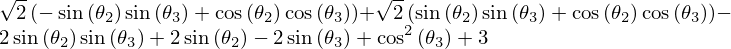

In [53]:
(WS_r2)

In [38]:
( sy.trigsimp( sy.diff(WS_r2, theta2)) )

Setting the above expression to zero, we get 

$\theta_2 = \tan^{-1} \left( \dfrac{1-\sin\theta_3}{\sqrt{2} \cos \theta_3} \right) + N \pi$, $\qquad N \in Integers$

From the above condition, we split it into two conditons:

# Condition 2 :

## $\theta_2 = \tan^{-1} \left( \dfrac{1-\sin\theta_3}{\sqrt{2} \cos \theta_3} \right) + 2 N \pi$, $\qquad N \in Integers$

# Condition 3:

## $\theta_2 = \tan^{-1} \left( \dfrac{1-\sin\theta_3}{\sqrt{2} \cos \theta_3} \right) + \left(2 N + 1\right) \pi$, $\qquad N \in Integers$

One may check that condition 2 corresponds to outer surface and condition 3 corresponds to inner surface 

In [57]:
# When condition 2 is applied
sy.trigsimp( WS_r2.subs([(sy.sin(theta2), (1-sy.sin(theta3))/(2+(sy.cos(theta3))**2-2*sy.sin(theta3))), 
           (sy.cos(theta2), (sy.sqrt(2)*sy.cos(theta3))/(2+(sy.cos(theta3))**2-2*sy.sin(theta3)))]) )

In [58]:
# When condition 3 is applied
sy.trigsimp( WS_r2.subs([(sy.sin(theta2), -(1-sy.sin(theta3))/(2+(sy.cos(theta3))**2-2*sy.sin(theta3))), 
           (sy.cos(theta2), -(sy.sqrt(2)*sy.cos(theta3))/(2+(sy.cos(theta3))**2-2*sy.sin(theta3)))]) )